## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.3,      # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [6]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2023-07-09 16:07:26.168448


{1: 26.0,
 5: 27.4,
 10: 28.3,
 20: 30.4,
 30: 32.2,
 40: 33.7,
 50: 35.3,
 60: 36.9,
 70: 38.8,
 80: 41.1,
 90: 45.4,
 95: 63.20499999999993,
 99: 68.2}

In [7]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2023-07-09 16:08:11.945910


{1: 25.299000000000003,
 5: 26.6,
 10: 27.3,
 20: 28.6,
 30: 30.0,
 40: 31.6,
 50: 33.0,
 60: 34.5,
 70: 36.2,
 80: 38.4,
 90: 42.1,
 95: 56.91999999999971,
 99: 67.5}

## Run Cotra 2020

-
-
## SAMPLE RUN 1 ##
It takes 38.5 log FLOP (~316 thousand decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (198 septillion) available - TAI takes 38.5 log FLOP (316 thousand decillion) - log $ 21.2 to buy TAI (2 sextillion) vs. willingness to pay log $ 9.0 (991 million) - 17.3 log FLOP per $ (200 quadrillion) (Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP (344 septillion) available - TAI takes 38.3 log FLOP (224 thousand decillion) - log $ 20.9 to buy TAI (849 quintillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quad

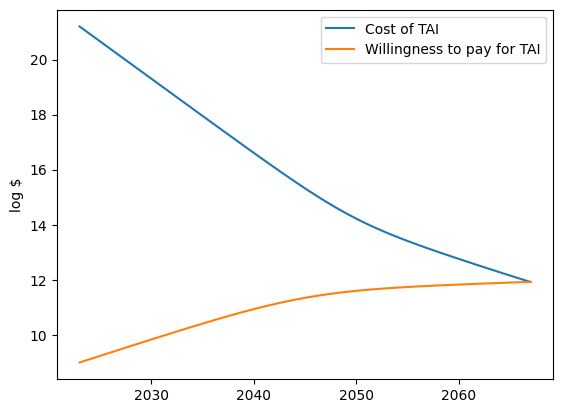

-
-
## SAMPLE RUN 2 ##
It takes 31.2 log FLOP (~16 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (198 septillion) available - TAI takes 31.2 log FLOP (16 nonillion) - log $ 13.9 to buy TAI (79 trillion) vs. willingness to pay log $ 9.0 (991 million) - 17.3 log FLOP per $ (200 quadrillion) (Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP (344 septillion) available - TAI takes 31.1 log FLOP (13 nonillion) - log $ 13.7 to buy TAI (48 trillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quadrillion) (Effective 2023-logFLOP:

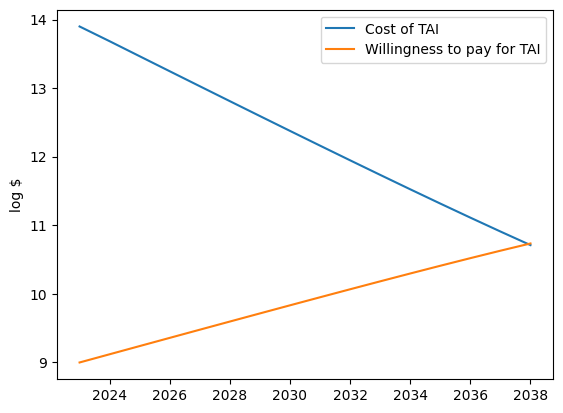

-
-
## SAMPLE RUN 3 ##
It takes 39.0 log FLOP (~1 million decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (198 septillion) available - TAI takes 39.0 log FLOP (1 million decillion) - log $ 21.7 to buy TAI (5 sextillion) vs. willingness to pay log $ 9.0 (991 million) - 17.3 log FLOP per $ (200 quadrillion) (Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP (344 septillion) available - TAI takes 38.8 log FLOP (707 thousand decillion) - log $ 21.4 to buy TAI (3 sextillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quadrillion) 

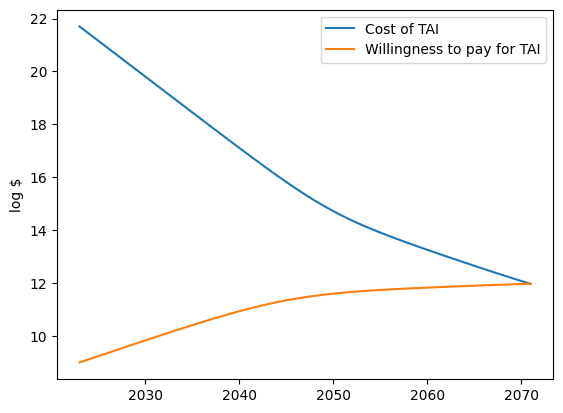

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1287.70it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.47it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2028',
 '10%: 2030',
 '15%: 2033',
 '20%: 2036',
 '25%: 2039',
 '35%: 2045',
 '50%: 2050',
 '60%: 2061',
 '75%: 2079',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
(Mean: 2065)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 5 years from now',
 '10%: 7 years from now',
 '15%: 10 years from now',
 '20%: 13 years from now',
 '25%: 16 years from now',
 '35%: 22 years from now',
 '50%: 27 years from now',
 '60%: 38 years from now',
 '75%: 56 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 42 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 1.4%
2024-2027: 2.6%
2028-2029: 5.0%
2030-2034: 7.8%
2035-2039: 9.2%
2040-2049: 23.3%
2050-2059: 9.2%
2060-2069: 10.9%
2070-2079: 6.2%
2080-2089: 1.3%
2090-2099: 1.0%
2100-2109: 0.4%
2110-2119: 0.5%
>2120: 21.3%
-
-
## TAI ARRIVAL DATE BY YEAR

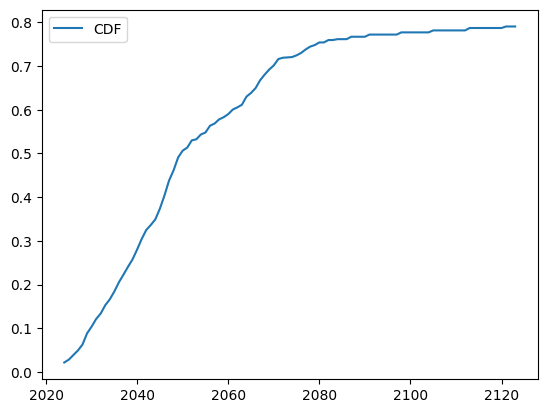

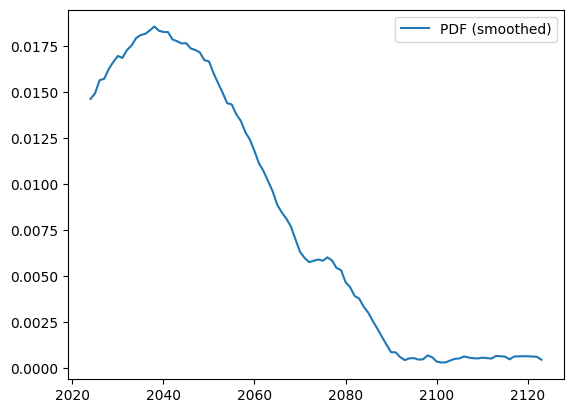

-
-
## TAI FLOP SIZE ##
{1: 25.7,
 5: 27.3,
 10: 28.5,
 20: 30.4,
 30: 32.1,
 40: 33.8,
 50: 35.2,
 60: 36.9,
 70: 38.7,
 80: 41.1,
 90: 45.2,
 95: 62.4,
 99: 67.4}
(Mean: 37.0)


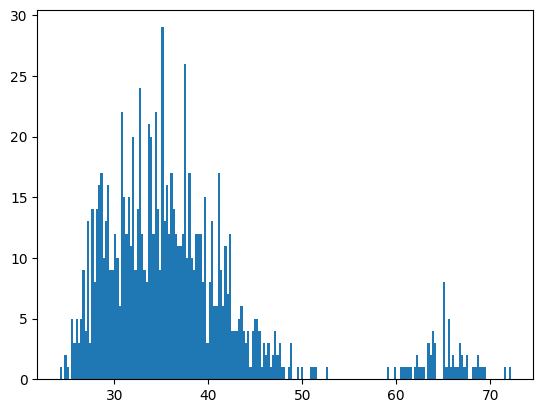

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 17.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


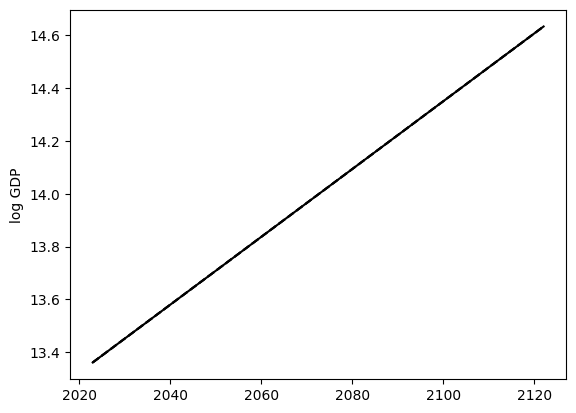

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

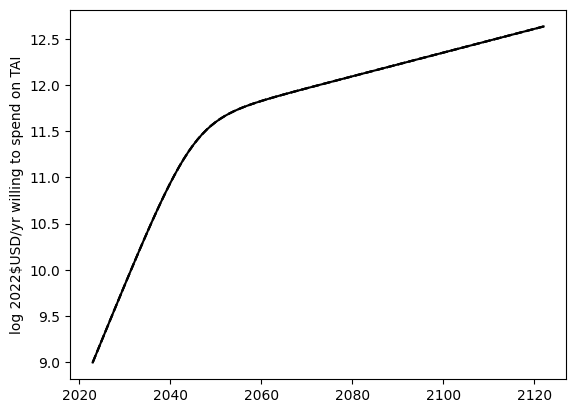

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

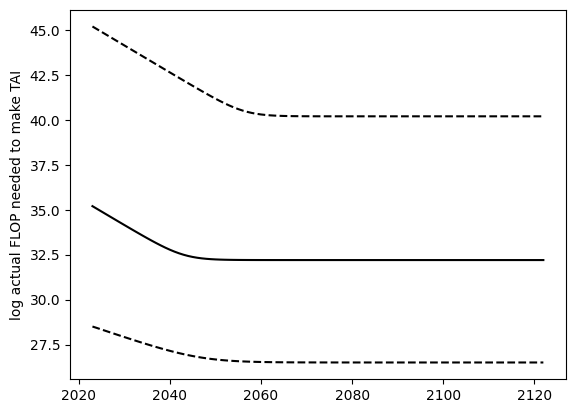

Year: 2023 - log FLOP needed for TAI 35.2 (~158 decillion) 90% CI 28.5 (~32 octillion) - 45.2 (~2 trillion decillion)
Year: 2024 - log FLOP needed for TAI 35.1 (~112 decillion) 90% CI 28.4 (~26 octillion) - 45.0 (~1 trillion decillion)
Year: 2025 - log FLOP needed for TAI 34.9 (~79 decillion) 90% CI 28.3 (~22 octillion) - 44.9 (~792 billion decillion)
Year: 2026 - log FLOP needed for TAI 34.7 (~56 decillion) 90% CI 28.2 (~18 octillion) - 44.7 (~560 billion decillion)
Year: 2027 - log FLOP needed for TAI 34.6 (~40 decillion) 90% CI 28.2 (~15 octillion) - 44.6 (~396 billion decillion)
Year: 2028 - log FLOP needed for TAI 34.4 (~28 decillion) 90% CI 28.1 (~12 octillion) - 44.4 (~280 billion decillion)
Year: 2029 - log FLOP needed for TAI 34.3 (~20 decillion) 90% CI 28.0 (~10 octillion) - 44.3 (~198 billion decillion)
Year: 2030 - log FLOP needed for TAI 34.2 (~14 decillion) 90% CI 27.9 (~8 octillion) - 44.1 (~140 billion decillion)
Year: 2031 - log FLOP needed for TAI 34.0 (~10 decillion)

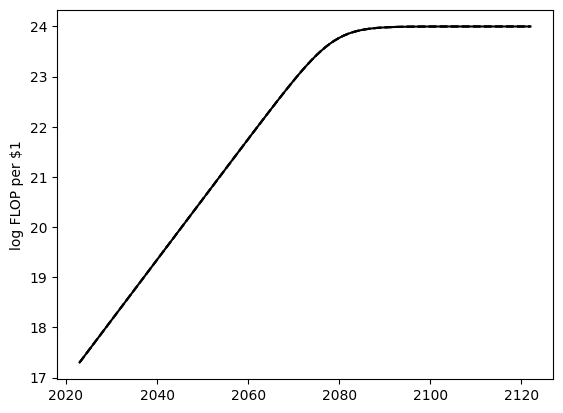

Year: 2023 - log FLOP per 2022$1USD 17.3 (~200 quadrillion) 90% CI 17.3 (~200 quadrillion) - 17.3 (~200 quadrillion)
Year: 2024 - log FLOP per 2022$1USD 17.4 (~263 quadrillion) 90% CI 17.4 (~263 quadrillion) - 17.4 (~263 quadrillion)
Year: 2025 - log FLOP per 2022$1USD 17.5 (~347 quadrillion) 90% CI 17.5 (~347 quadrillion) - 17.5 (~347 quadrillion)
Year: 2026 - log FLOP per 2022$1USD 17.7 (~458 quadrillion) 90% CI 17.7 (~458 quadrillion) - 17.7 (~458 quadrillion)
Year: 2027 - log FLOP per 2022$1USD 17.8 (~605 quadrillion) 90% CI 17.8 (~605 quadrillion) - 17.8 (~605 quadrillion)
Year: 2028 - log FLOP per 2022$1USD 17.9 (~798 quadrillion) 90% CI 17.9 (~798 quadrillion) - 17.9 (~798 quadrillion)
Year: 2029 - log FLOP per 2022$1USD 18.0 (~1 quintillion) 90% CI 18.0 (~1 quintillion) - 18.0 (~1 quintillion)
Year: 2030 - log FLOP per 2022$1USD 18.1 (~1 quintillion) 90% CI 18.1 (~1 quintillion) - 18.1 (~1 quintillion)
Year: 2031 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 qu

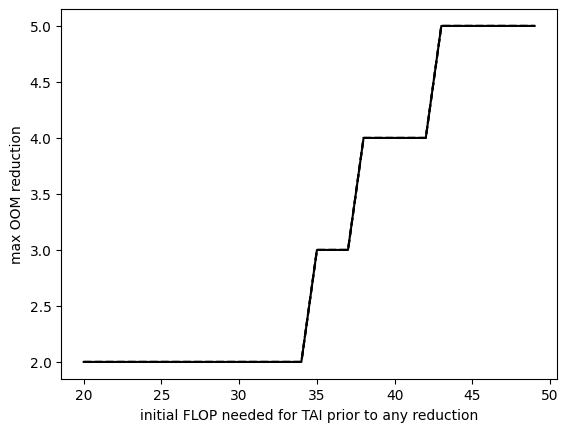

TAI log FLOP 20 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

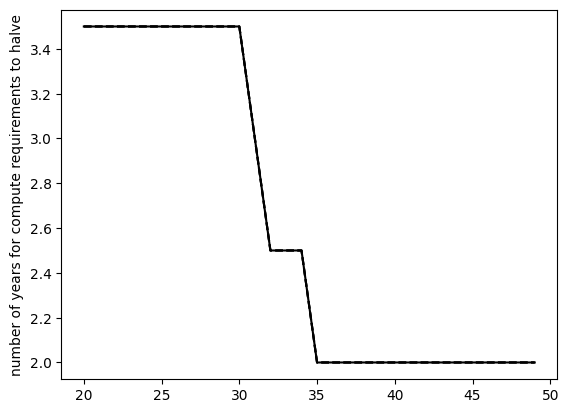

TAI log FLOP 20 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (90% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FL

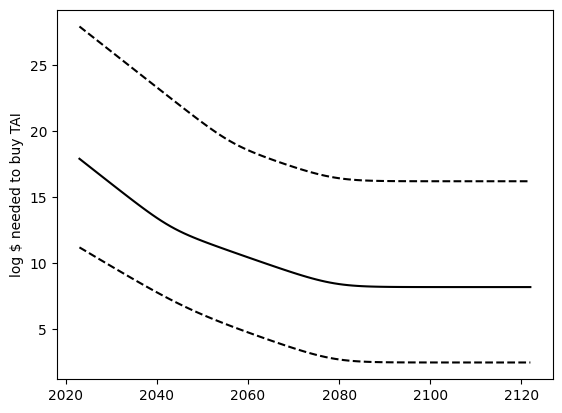

Year: 2023 - 17.9 log 2022$USD to buy TAI (~794 quadrillion) 90% CI 11.2 (~158 billion) - 27.9 (~8 octillion)
Year: 2024 - 17.6 log 2022$USD to buy TAI (~426 quadrillion) 90% CI 11.0 (~100 billion) - 27.6 (~4 octillion)
Year: 2025 - 17.4 log 2022$USD to buy TAI (~229 quadrillion) 90% CI 10.8 (~62 billion) - 27.4 (~2 octillion)
Year: 2026 - 17.1 log 2022$USD to buy TAI (~123 quadrillion) 90% CI 10.6 (~39 billion) - 27.1 (~1 octillion)
Year: 2027 - 16.8 log 2022$USD to buy TAI (~66 quadrillion) 90% CI 10.4 (~24 billion) - 26.8 (~655 septillion)
Year: 2028 - 16.5 log 2022$USD to buy TAI (~35 quadrillion) 90% CI 10.2 (~15 billion) - 26.5 (~351 septillion)
Year: 2029 - 16.3 log 2022$USD to buy TAI (~19 quadrillion) 90% CI 10.0 (~9 billion) - 26.3 (~188 septillion)
Year: 2030 - 16.0 log 2022$USD to buy TAI (~10 quadrillion) 90% CI 9.8 (~6 billion) - 26.0 (~101 septillion)
Year: 2031 - 15.7 log 2022$USD to buy TAI (~5 quadrillion) 90% CI 9.6 (~4 billion) - 25.7 (~54 septillion)
Year: 2032 - 1

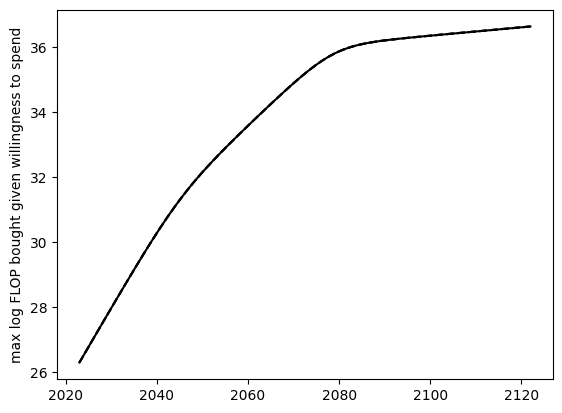

Year: 2023 - max log FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log FLOP 26.5 (~345 septillion) 90% CI 26.5 (~345 septillion) - 26.5 (~345 septillion)
Year: 2025 - max log FLOP 26.8 (~601 septillion) 90% CI 26.8 (~601 septillion) - 26.8 (~601 septillion)
Year: 2026 - max log FLOP 27.0 (~1 octillion) 90% CI 27.0 (~1 octillion) - 27.0 (~1 octillion)
Year: 2027 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2028 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2029 - max log FLOP 27.7 (~5 octillion) 90% CI 27.7 (~5 octillion) - 27.7 (~5 octillion)
Year: 2030 - max log FLOP 28.0 (~9 octillion) 90% CI 28.0 (~9 octillion) - 28.0 (~9 octillion)
Year: 2031 - max log FLOP 28.2 (~16 octillion) 90% CI 28.2 (~16 octillion) - 28.2 (~16 octillion)
Year: 2032 - max log FLOP 28.5 (~28 octillion) 90% CI 28.5 (~28 octillion) - 28.5 (~28 octillion)
Year: 2033 - max 

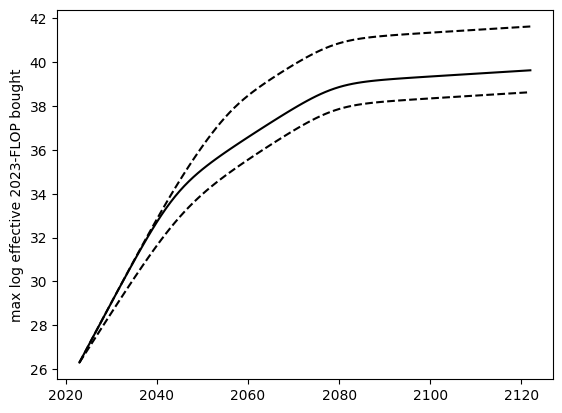

Year: 2023 - max log effective 2023-FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log effective 2023-FLOP 26.7 (~488 septillion) 90% CI 26.6 (~416 septillion) - 26.7 (~489 septillion)
Year: 2025 - max log effective 2023-FLOP 27.1 (~1 octillion) 90% CI 26.9 (~879 septillion) - 27.1 (~1 octillion)
Year: 2026 - max log effective 2023-FLOP 27.5 (~3 octillion) 90% CI 27.3 (~2 octillion) - 27.5 (~3 octillion)
Year: 2027 - max log effective 2023-FLOP 27.9 (~7 octillion) 90% CI 27.6 (~4 octillion) - 27.9 (~7 octillion)
Year: 2028 - max log effective 2023-FLOP 28.2 (~18 octillion) 90% CI 27.9 (~8 octillion) - 28.3 (~18 octillion)
Year: 2029 - max log effective 2023-FLOP 28.6 (~43 octillion) 90% CI 28.2 (~17 octillion) - 28.6 (~44 octillion)
Year: 2030 - max log effective 2023-FLOP 29.0 (~106 octillion) 90% CI 28.6 (~36 octillion) - 29.0 (~107 octillion)
Year: 2031 - max log effective 2023-FLOP 29.4 (~257 octillion) 90% CI 28.9 (~76 octillion

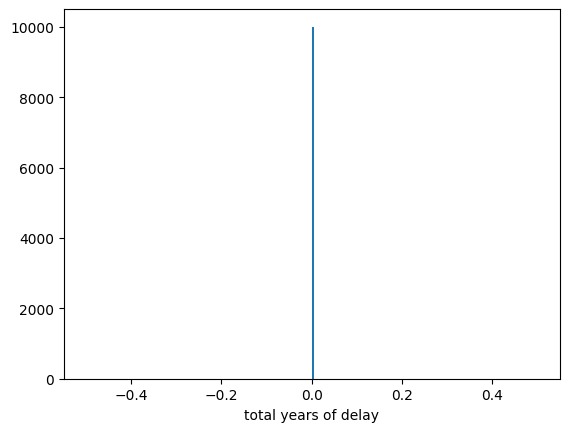

In [8]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022

-
-
## SAMPLE RUN 1 ##
It takes 29.0 log FLOP (~100 octillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 29.0 log FLOP (100 octillion) - log $ 10.7 to buy TAI (50 billion) vs. willingness to pay log $ 9.0 (991 million) - 18.3 log FLOP per $ (2 quintillion) (Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 28.9 log FLOP (83 octillion) - log $ 10.5 to buy TAI (32 billion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion) (Effective 2023-logFLOP: 27.4)
Year:

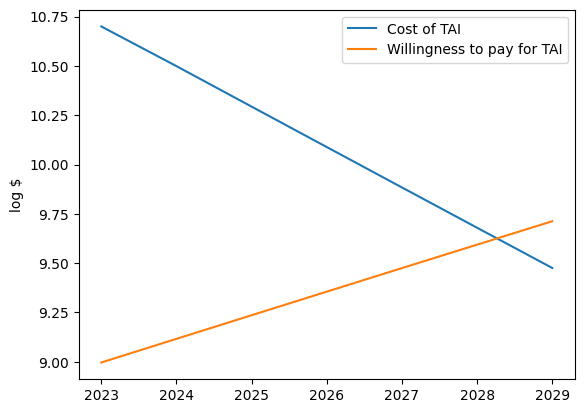

-
-
## SAMPLE RUN 2 ##
It takes 33.0 log FLOP (~1000 nonillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 33.0 log FLOP (1000 nonillion) - log $ 14.7 to buy TAI (501 trillion) vs. willingness to pay log $ 9.0 (991 million) - 18.3 log FLOP per $ (2 quintillion) (Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 32.9 log FLOP (768 nonillion) - log $ 14.5 to buy TAI (292 trillion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion) (Effective 2023-logFLOP: 27.4

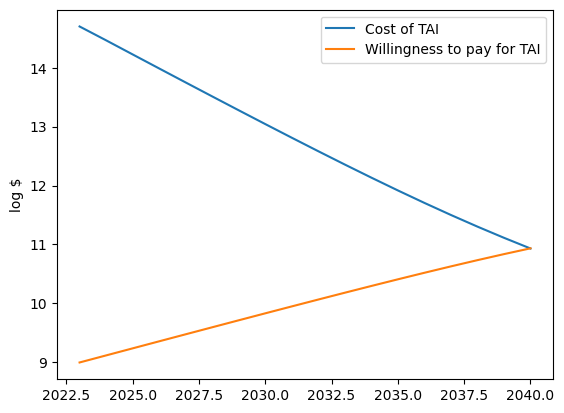

-
-
## SAMPLE RUN 3 ##
It takes 36.9 log FLOP (~8 thousand decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~996 million). This doubles every 2.5 years to a max of 1.0% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 36.9 log FLOP (8 thousand decillion) - log $ 18.6 to buy TAI (4 quintillion) vs. willingness to pay log $ 9.0 (991 million) - 18.3 log FLOP per $ (2 quintillion) (Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 36.8 log FLOP (6 thousand decillion) - log $ 18.3 to buy TAI (2 quintillion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion) (Effective

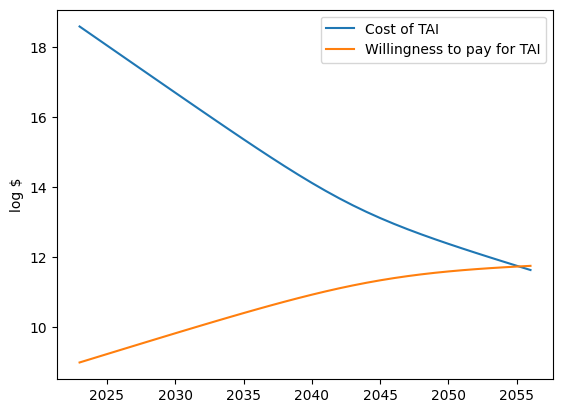

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1332.81it/s]


Shuffling data...
Writing data...
Waiting for other cores...
..Collecting data...


100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 99.77it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2023',
 '10%: 2024',
 '15%: 2026',
 '20%: 2028',
 '25%: 2030',
 '35%: 2035',
 '50%: 2041',
 '60%: 2044',
 '75%: 2058',
 '80%: 2062',
 '90%: >2123',
 '95%: >2123']
(Mean: 2052)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 1 years from now',
 '15%: 3 years from now',
 '20%: 5 years from now',
 '25%: 7 years from now',
 '35%: 12 years from now',
 '50%: 18 years from now',
 '60%: 21 years from now',
 '75%: 35 years from now',
 '80%: 39 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 29 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 8.0%
2024-2027: 8.5%
2028-2029: 7.8%
2030-2034: 10.4%
2035-2039: 12.7%
2040-2049: 20.1%
2050-2059: 9.8%
2060-2069: 5.6%
2070-2079: 1.9%
2080-2089: 0.5%
2090-2099: 0.3%
2100-2109: 0.2%
2110-2119: 0.2%
>2120: 14.0%
-
-
## TAI ARRIVAL DATE BY YEAR ##
B

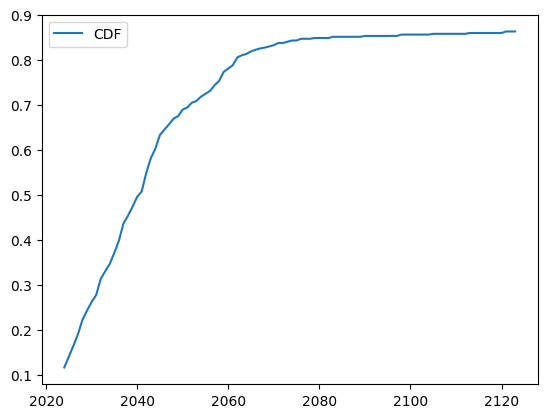

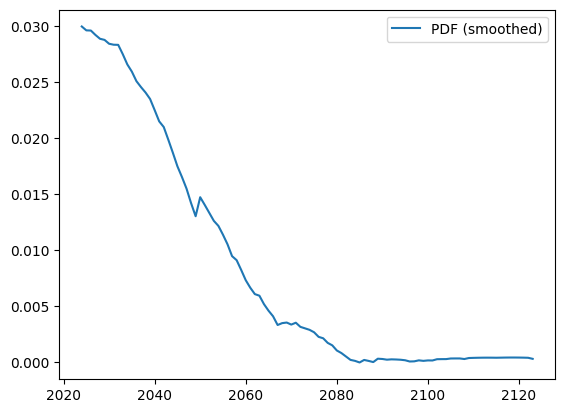

-
-
## TAI FLOP SIZE ##
{1: 25.3,
 5: 26.4,
 10: 27.3,
 20: 28.7,
 30: 29.9,
 40: 31.3,
 50: 32.7,
 60: 33.9,
 70: 35.4,
 80: 37.9,
 90: 40.7,
 95: 44.8,
 99: 66.4}
(Mean: 34.1)


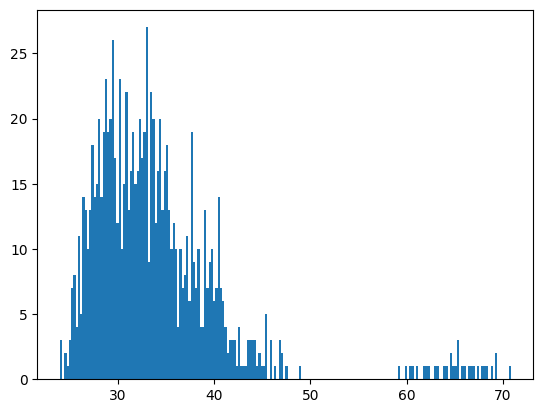

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


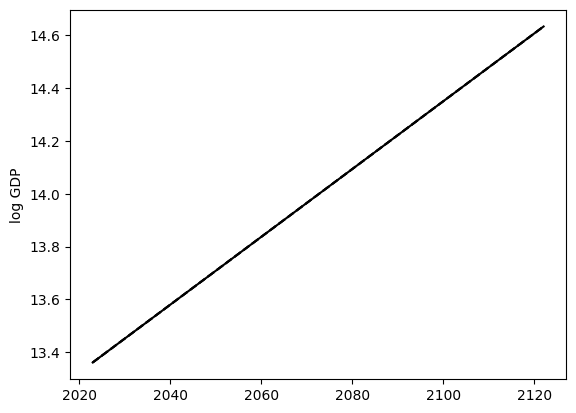

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

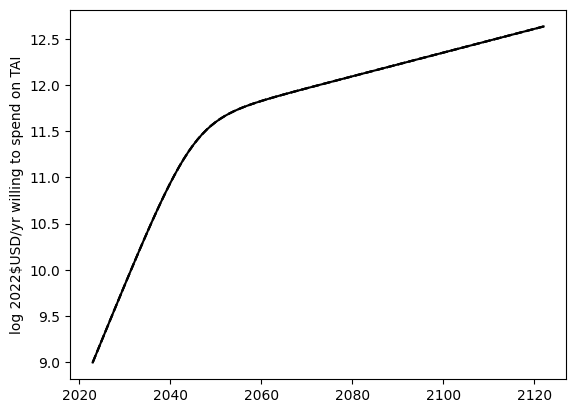

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

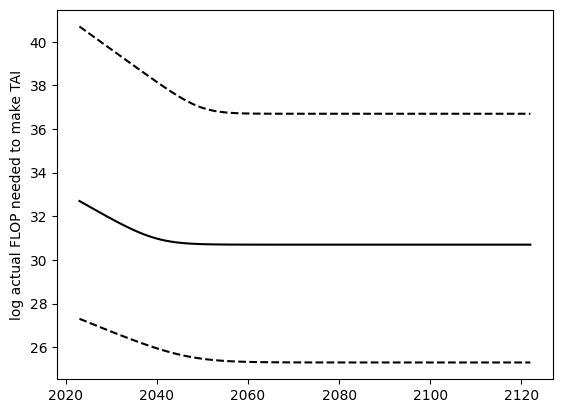

Year: 2023 - log FLOP needed for TAI 32.7 (~501 nonillion) 90% CI 27.3 (~2 octillion) - 40.7 (~50 million decillion)
Year: 2024 - log FLOP needed for TAI 32.6 (~385 nonillion) 90% CI 27.2 (~2 octillion) - 40.5 (~35 million decillion)
Year: 2025 - log FLOP needed for TAI 32.5 (~293 nonillion) 90% CI 27.1 (~1 octillion) - 40.4 (~25 million decillion)
Year: 2026 - log FLOP needed for TAI 32.3 (~223 nonillion) 90% CI 27.0 (~1 octillion) - 40.2 (~18 million decillion)
Year: 2027 - log FLOP needed for TAI 32.2 (~170 nonillion) 90% CI 27.0 (~924 septillion) - 40.1 (~13 million decillion)
Year: 2028 - log FLOP needed for TAI 32.1 (~130 nonillion) 90% CI 26.9 (~761 septillion) - 39.9 (~9 million decillion)
Year: 2029 - log FLOP needed for TAI 32.0 (~100 nonillion) 90% CI 26.8 (~628 septillion) - 39.8 (~6 million decillion)
Year: 2030 - log FLOP needed for TAI 31.9 (~77 nonillion) 90% CI 26.7 (~519 septillion) - 39.6 (~4 million decillion)
Year: 2031 - log FLOP needed for TAI 31.8 (~60 nonillion

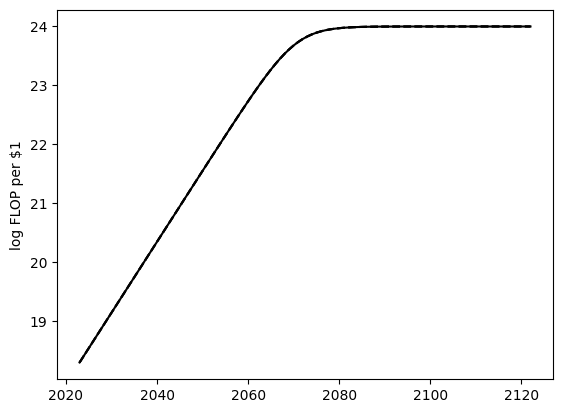

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.8 (~6 quintillion) 90% CI 18.8 (~6 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~8 quintillion) 90% CI 18.9 (~8 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~14 quintillion) 90% CI 19.1 (~14 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.3 (~18 quintillion) 90% CI 19.3 (~18 quintillion) - 19.3 (~18 quint

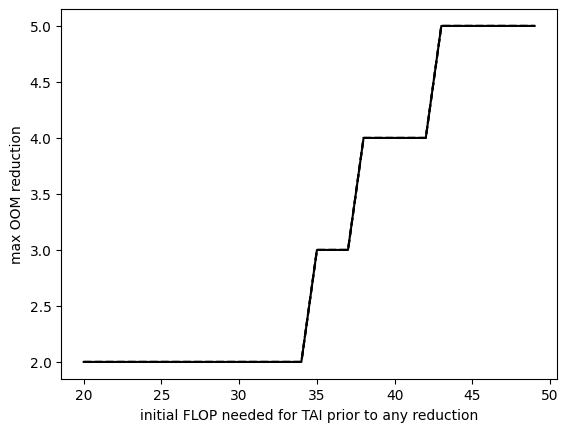

TAI log FLOP 20 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (90% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

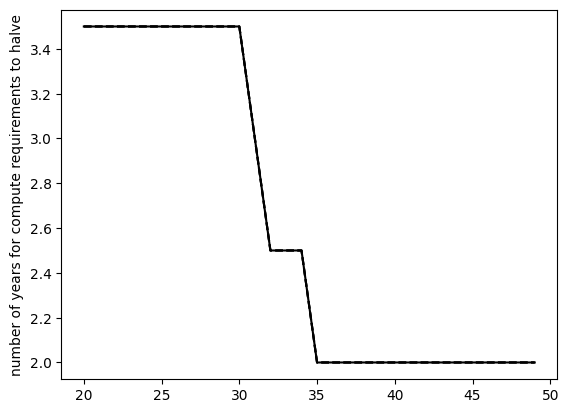

TAI log FLOP 20 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (90% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (90% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (90% CI: 2.5 to 2.5)
TAI log FL

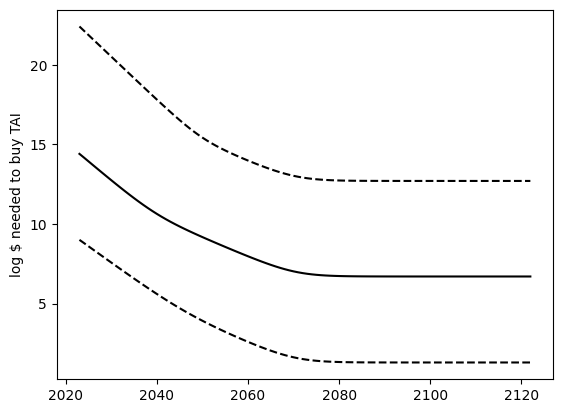

Year: 2023 - 14.4 log 2022$USD to buy TAI (~251 trillion) 90% CI 9.0 (~1 billion) - 22.4 (~25 sextillion)
Year: 2024 - 14.2 log 2022$USD to buy TAI (~146 trillion) 90% CI 8.8 (~629 million) - 22.1 (~13 sextillion)
Year: 2025 - 13.9 log 2022$USD to buy TAI (~84 trillion) 90% CI 8.6 (~392 million) - 21.9 (~7 sextillion)
Year: 2026 - 13.7 log 2022$USD to buy TAI (~49 trillion) 90% CI 8.4 (~245 million) - 21.6 (~4 sextillion)
Year: 2027 - 13.4 log 2022$USD to buy TAI (~28 trillion) 90% CI 8.2 (~153 million) - 21.3 (~2 sextillion)
Year: 2028 - 13.2 log 2022$USD to buy TAI (~16 trillion) 90% CI 8.0 (~95 million) - 21.0 (~1 sextillion)
Year: 2029 - 13.0 log 2022$USD to buy TAI (~9 trillion) 90% CI 7.8 (~60 million) - 20.8 (~595 quintillion)
Year: 2030 - 12.7 log 2022$USD to buy TAI (~6 trillion) 90% CI 7.6 (~37 million) - 20.5 (~319 quintillion)
Year: 2031 - 12.5 log 2022$USD to buy TAI (~3 trillion) 90% CI 7.4 (~23 million) - 20.2 (~171 quintillion)
Year: 2032 - 12.3 log 2022$USD to buy TAI 

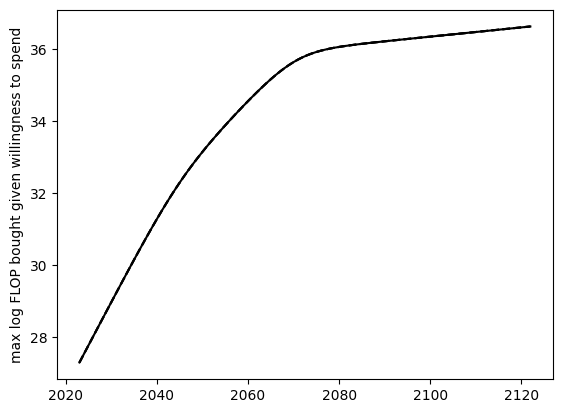

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2025 - max log FLOP 27.8 (~6 octillion) 90% CI 27.8 (~6 octillion) - 27.8 (~6 octillion)
Year: 2026 - max log FLOP 28.0 (~10 octillion) 90% CI 28.0 (~10 octillion) - 28.0 (~10 octillion)
Year: 2027 - max log FLOP 28.3 (~18 octillion) 90% CI 28.3 (~18 octillion) - 28.3 (~18 octillion)
Year: 2028 - max log FLOP 28.5 (~31 octillion) 90% CI 28.5 (~31 octillion) - 28.5 (~31 octillion)
Year: 2029 - max log FLOP 28.7 (~55 octillion) 90% CI 28.7 (~55 octillion) - 28.7 (~55 octillion)
Year: 2030 - max log FLOP 29.0 (~94 octillion) 90% CI 29.0 (~94 octillion) - 29.0 (~94 octillion)
Year: 2031 - max log FLOP 29.2 (~163 octillion) 90% CI 29.2 (~163 octillion) - 29.2 (~163 octillion)
Year: 2032 - max log FLOP 29.5 (~282 octillion) 90% CI 29.5 (~282 octillion) - 29.5 (~282 octillion)
Year: 2033 - max log FL

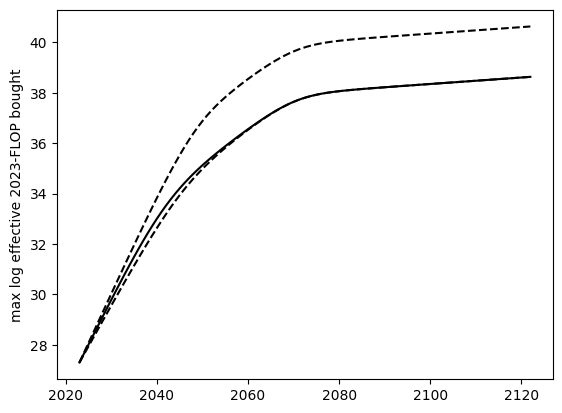

Year: 2023 - max log effective 2023-FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log effective 2023-FLOP 27.7 (~4 octillion) 90% CI 27.6 (~4 octillion) - 27.7 (~5 octillion)
Year: 2025 - max log effective 2023-FLOP 28.0 (~10 octillion) 90% CI 27.9 (~9 octillion) - 28.1 (~12 octillion)
Year: 2026 - max log effective 2023-FLOP 28.4 (~23 octillion) 90% CI 28.3 (~19 octillion) - 28.5 (~30 octillion)
Year: 2027 - max log effective 2023-FLOP 28.7 (~53 octillion) 90% CI 28.6 (~39 octillion) - 28.9 (~72 octillion)
Year: 2028 - max log effective 2023-FLOP 29.1 (~121 octillion) 90% CI 28.9 (~82 octillion) - 29.2 (~178 octillion)
Year: 2029 - max log effective 2023-FLOP 29.4 (~273 octillion) 90% CI 29.2 (~173 octillion) - 29.6 (~436 octillion)
Year: 2030 - max log effective 2023-FLOP 29.8 (~615 octillion) 90% CI 29.6 (~363 octillion) - 30.0 (~1 nonillion)
Year: 2031 - max log effective 2023-FLOP 30.1 (~1 nonillion) 90% CI 29.9 (~759 octillion) - 30.4 

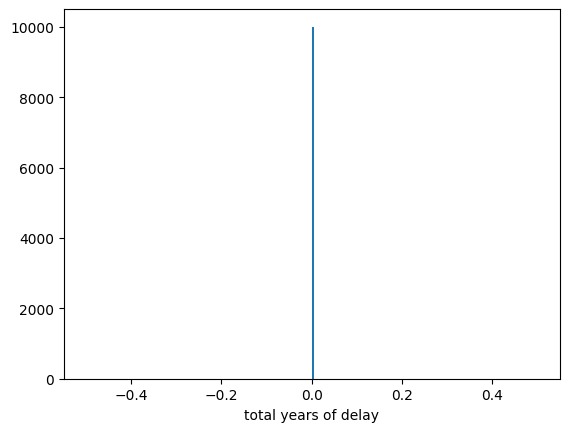

In [9]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-07-09 16:11:36.520544
